In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
col_names=['age','workclass','fnlwgt','education','educational-num','marital-status','ocupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv('/content/adult.csv', sep=',',names = col_names ,na_values="?",  header=None)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,ocupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational-num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   ocupation        32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
ocupation,0
relationship,0
race,0
gender,0


In [ ]:
df.drop(columns=['fnlwgt'],inplace=True)
df.dropna(inplace=True)

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,7,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,13,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32557,40,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
32558,58,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
32559,22,9,0,0,20,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
x=df.drop(columns=['income_ >50K'])
y=df['income_ >50K']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


The accuracy score is:  85.33701827115001
The train score is:  86.80128992628993
The test score is:  85.33701827115001
              precision    recall  f1-score   support

       False       0.89      0.92      0.91      4942
        True       0.72      0.64      0.68      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



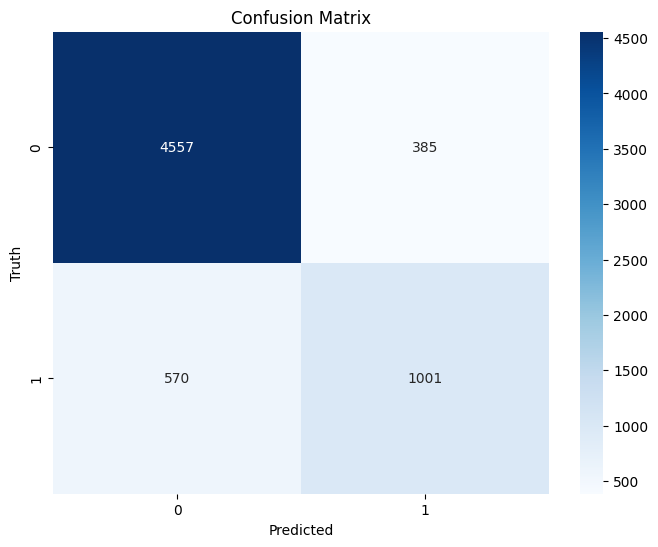

In [ ]:
kn = KNeighborsClassifier(n_neighbors=13)
kn.fit(x_train,y_train)
y_pred_kn= kn.predict(x_test)
print("The accuracy score is: ",accuracy_score(y_test,y_pred_kn)*100)
print("The train score is: ", kn.score(x_train,y_train)*100)
print("The test score is: ",kn.score(x_test,y_test)*100)
print(classification_report(y_test,y_pred_kn))

cm3 = confusion_matrix(y_test,y_pred_kn)
plt.figure(figsize=(8,6))
sns.heatmap(cm3,annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Lo = LogisticRegression(max_iter=900)
Lo.fit(x_train, y_train)
y_pred_lo = Lo.predict(x_test)
accuracy_score(y_test, y_pred_lo)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8519883310302472

In [ ]:
svc = SVC(C=5)
svc.fit(x_train,y_train)
y_pred_svc= svc.predict(x_test)
print("The accuracy score is: ", accuracy_score(y_test, y_pred_svc)*100)
print("The train score is: ",svc.score(x_train,y_train)*100)
print("The test score is: ", svc.score(x_test,y_test)*100)
print(classification_report(y_test,y_pred_svc))

The accuracy score is:  81.06863196683555
The train score is:  80.65494471744472
The test score is:  81.06863196683555
              precision    recall  f1-score   support

       False       0.81      0.98      0.89      4942
        True       0.81      0.28      0.42      1571

    accuracy                           0.81      6513
   macro avg       0.81      0.63      0.65      6513
weighted avg       0.81      0.81      0.77      6513



In [ ]:
model = GaussianNB()
model.fit(x,y)
print("Accuracy = ",accuracy_score(y,model.predict(x))*100)
print(classification_report(y,model.predict(x)))

Accuracy =  82.72166088265102
              precision    recall  f1-score   support

       False       0.91      0.86      0.88     24720
        True       0.62      0.72      0.67      7841

    accuracy                           0.83     32561
   macro avg       0.76      0.79      0.78     32561
weighted avg       0.84      0.83      0.83     32561

